## Environment Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Load data
housing = pd.read_csv('D600_Task_1_Dataset_1_Housing_Information.csv')
housing.head().T

,0,1,2,3,4
ID,4922,5009,4450,1070,400
Price,255614.8992,155586.0947,131050.8324,151361.7125,113167.6128
SquareFootage,566.62,1472.34,550.0,941.81,550.0
NumBathrooms,1.0,1.0,1.779354,2.035254,1.064644
NumBedrooms,4,2,3,2,3
BackyardSpace,779.42,656.13,754.57,439.59,353.03
CrimeRate,20.56,15.62,12.47,22.22,8.28
SchoolRating,5.62,5.63,9.2,7.08,5.93
AgeOfHome,39.46,40.51,48.38,94.67,16.8
DistanceToCityCenter,10.08,7.89,23.74,5.22,43.13


In [3]:
# Explore data
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    7000 non-null   int64  
 1   Price                 7000 non-null   float64
 2   SquareFootage         7000 non-null   float64
 3   NumBathrooms          7000 non-null   float64
 4   NumBedrooms           7000 non-null   int64  
 5   BackyardSpace         7000 non-null   float64
 6   CrimeRate             7000 non-null   float64
 7   SchoolRating          7000 non-null   float64
 8   AgeOfHome             7000 non-null   float64
 9   DistanceToCityCenter  7000 non-null   float64
 10  EmploymentRate        7000 non-null   float64
 11  PropertyTaxRate       7000 non-null   float64
 12  RenovationQuality     7000 non-null   float64
 13  LocalAmenities        7000 non-null   float64
 14  TransportAccess       7000 non-null   float64
 15  Fireplace            

In [4]:
# Data Wrangling
# Map 'Fireplace' values: 'No': 0, 'Yes': 1
housing['Fireplace'] = housing['Fireplace'].map({'No': 0, 'Yes': 1})

# Map 'Garage' values: 'No': 0, 'Yes': 1
housing['Garage'] = housing['Garage'].map({'No': 0, 'Yes': 1})

# Change data type of 'Fireplace' and 'Garage' to int
housing['Fireplace'] = housing['Fireplace'].astype(int)
housing['Garage'] = housing['Garage'].astype(int)

# Drop 'HouseColor' column as it should have no bearing on price
housing.drop('HouseColor', axis=1, inplace=True)

# Review DataFrame
housing.head().T

,0,1,2,3,4
ID,4922.0000,5009.00000,4450.000000,1070.000000,400.000000
Price,255614.8992,155586.09470,131050.832400,151361.712500,113167.612800
SquareFootage,566.6200,1472.34000,550.000000,941.810000,550.000000
NumBathrooms,1.0000,1.00000,1.779354,2.035254,1.064644
NumBedrooms,4.0000,2.00000,3.000000,2.000000,3.000000
BackyardSpace,779.4200,656.13000,754.570000,439.590000,353.030000
CrimeRate,20.5600,15.62000,12.470000,22.220000,8.280000
SchoolRating,5.6200,5.63000,9.200000,7.080000,5.930000
AgeOfHome,39.4600,40.51000,48.380000,94.670000,16.800000
DistanceToCityCenter,10.0800,7.89000,23.740000,5.220000,43.130000


<Axes: >

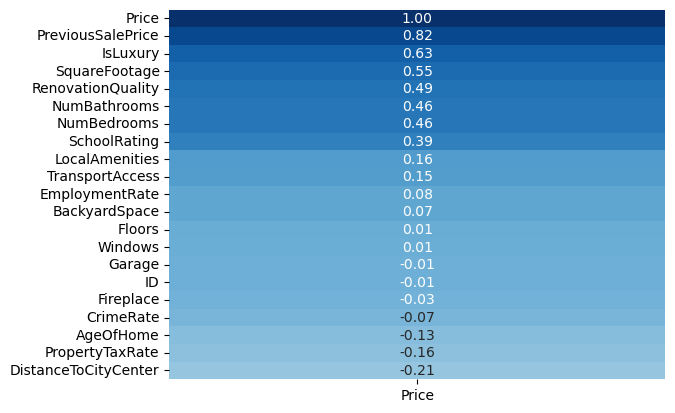

In [7]:
# Create a heatmap to visualize correlations with price
# (MyCoy 2024)
sns.heatmap(data=housing.corr()[['Price']].sort_values(by='Price', 
                                                       ascending=False),     annot=True, cmap='Blues', 
                                                       vmin=-1.0, 
                                                       vmax=1.0, 
                                                       cbar=False, 
                                                       fmt='.2f')

## C1. Variable Identification

- Dependent variable: `Price`
- Independent variables: `SquareFootage`, `NumBedrooms`, `PreviousSalePrice`

## C2. Descriptive Statistics

In [9]:
# Descriptive stats for DV ('Price') and 
# IVs ('SquareFootage', 'NumBedrooms', 'PreviousSalePrice)
var_cols = ['Price', 'SquareFootage', 'NumBedrooms', 'PreviousSalePrice']
housing_df = housing[var_cols]
housing_df.describe()

,Price,SquareFootage,NumBedrooms,PreviousSalePrice
count,7.000000e+03,7000.000000,7000.000000,7.000000e+03
mean,3.072820e+05,1048.947459,3.008571,2.845094e+05
std,1.501734e+05,426.010482,1.021940,1.857340e+05
min,8.500000e+04,550.000000,1.000000,-8.356902e+03
25%,1.921075e+05,660.815000,2.000000,1.420140e+05
50%,2.793230e+05,996.320000,3.000000,2.621831e+05
75%,3.918781e+05,1342.292500,4.000000,3.961212e+05
max,1.046676e+06,2874.700000,7.000000,1.296607e+06


## C3. Visualizations

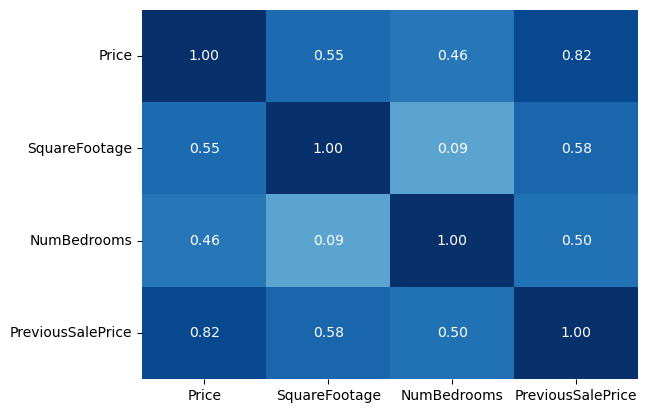

In [11]:
# Correlation of subset variables
sns.heatmap(housing_df.corr(), annot=True, cmap='Blues', vmin=-1.0, vmax=1.0, 
            cbar=False, fmt='.2f')
plt.show()

### Univariate Visualizations

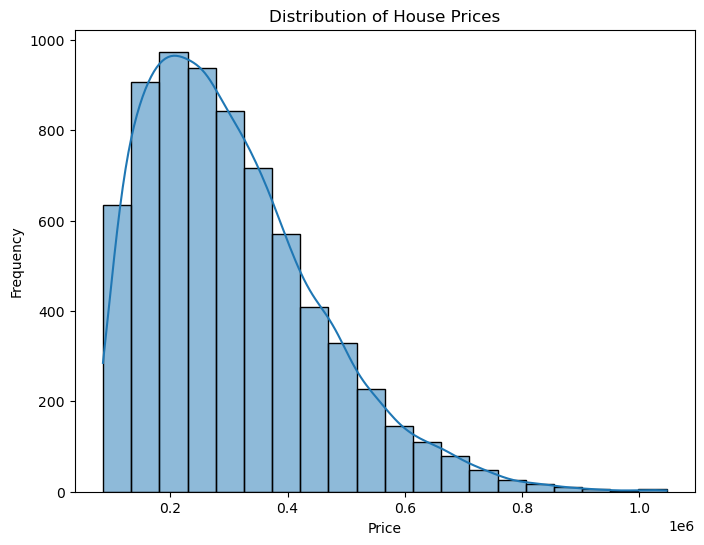

In [12]:
# Histogram of `Price` Distribution
plt.figure(figsize=(8, 6))
sns.histplot(housing_df['Price'], bins=20, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

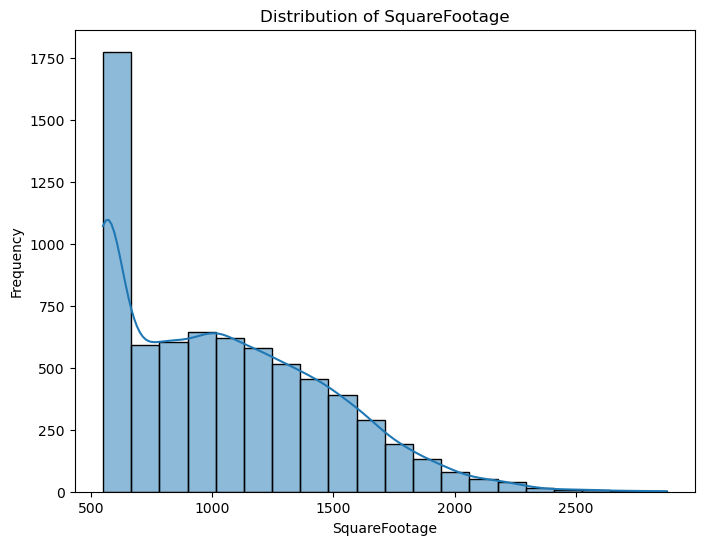

In [13]:
# Histogram of `SquareFootage` Distribution
plt.figure(figsize=(8, 6))
sns.histplot(housing_df['SquareFootage'], bins=20, kde=True)
plt.title('Distribution of SquareFootage')
plt.xlabel('SquareFootage')
plt.ylabel('Frequency')
plt.show()

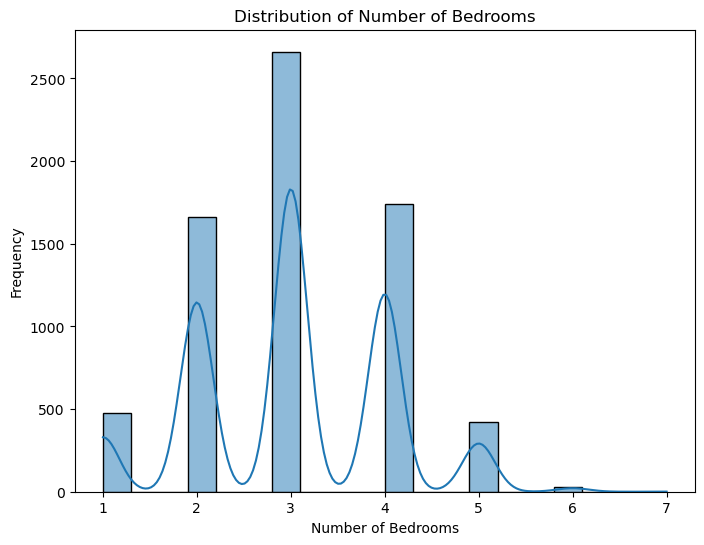

In [14]:
# Histogram of `NumBedrooms` Distribution
plt.figure(figsize=(8, 6))
sns.histplot(housing_df['NumBedrooms'], bins=20, kde=True)
plt.title('Distribution of Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.show()

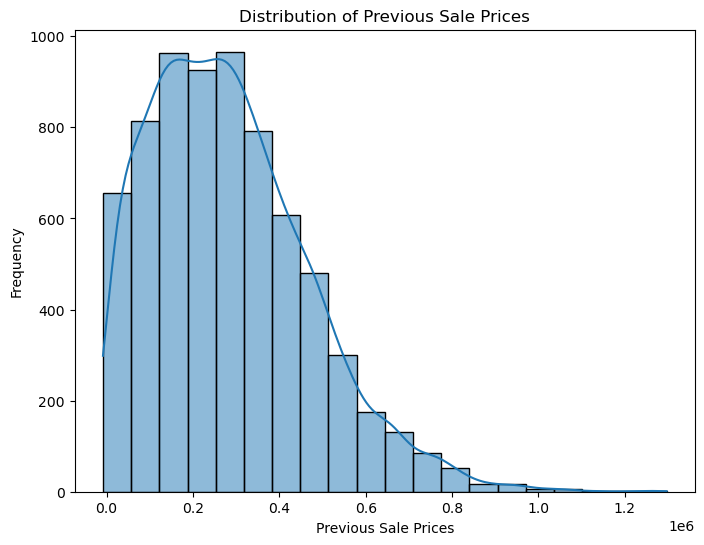

In [15]:
# Histogram of `PreviousSalePrice` Distribution
plt.figure(figsize=(8, 6))
sns.histplot(housing_df['PreviousSalePrice'], bins=20, kde=True)
plt.title('Distribution of Previous Sale Prices')
plt.xlabel('Previous Sale Prices')
plt.ylabel('Frequency')
plt.show()

### Bivariate Visualizations

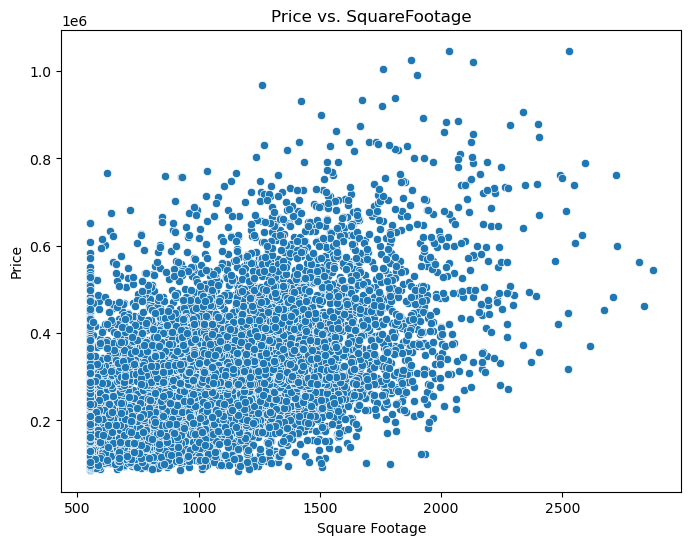

In [16]:
# Scatter plot of `Price` vs `SquareFootage`
plt.figure(figsize=(8, 6))
sns.scatterplot(data=housing_df, x='SquareFootage', y='Price')
plt.title('Price vs. SquareFootage')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()

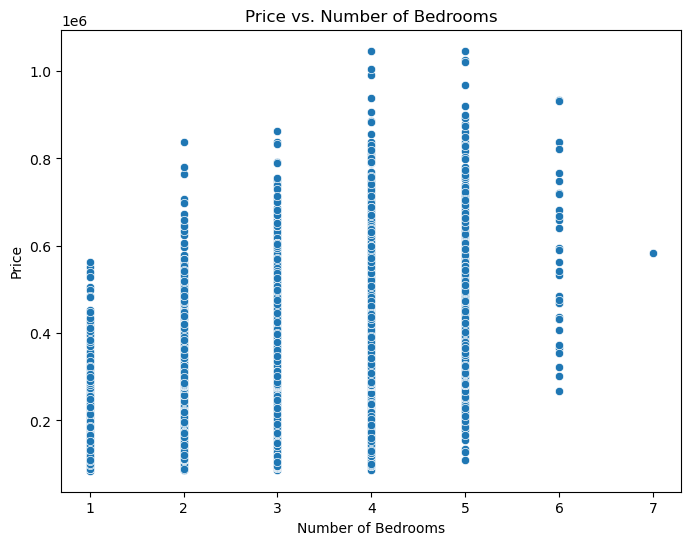

In [17]:
# Scatter plot of `Price` vs `NumBedrooms`
plt.figure(figsize=(8, 6))
sns.scatterplot(data=housing_df, x='NumBedrooms', y='Price')
plt.title('Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

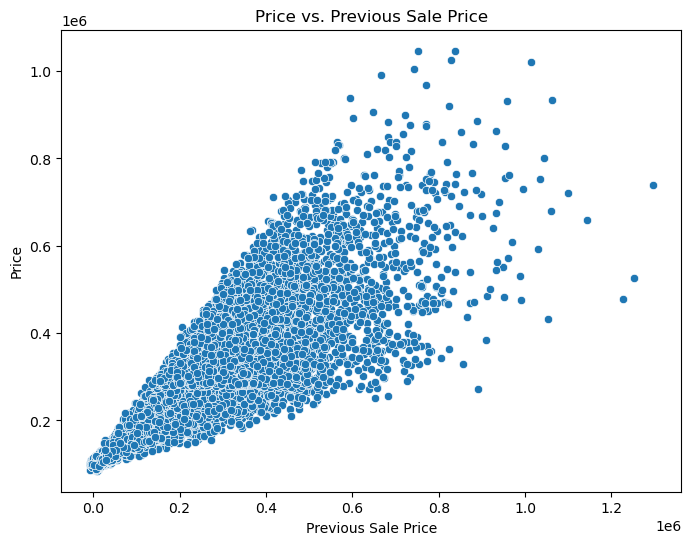

In [18]:
# Scatter plot of `Price` vs `PreviousSalePrice`
plt.figure(figsize=(8, 6))
sns.scatterplot(data=housing_df, x='PreviousSalePrice', y='Price')
plt.title('Price vs. Previous Sale Price')
plt.xlabel('Previous Sale Price')
plt.ylabel('Price')
plt.show()

## D1. Splitting the Data

In [19]:
# Split the data into the training and test datasets
train_df, test_df = train_test_split(housing, test_size=0.3, random_state=42)

In [20]:
# Dataset shapes
print(f"Training dataset shape: {train_df.shape}")
print(f"Test dataset shape: {test_df.shape}")

Training dataset shape: (4900, 21)
Test dataset shape: (2100, 21)


In [21]:
# Establishing the dependent and independent variables
X_train = train_df[['SquareFootage', 'NumBedrooms', 'PreviousSalePrice']]
y_train = train_df['Price']

# Add a constant to the independent variables
X_train = sm.add_constant(X_train)

# Fit the OLS Regression model
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     3570.
Date:                Thu, 06 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:17:11   Log-Likelihood:                -62548.
No. Observations:                4900   AIC:                         1.251e+05
Df Residuals:                    4896   BIC:                         1.251e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              5.343e+04   5011.818     10.662      0.000    4.36e+04    6.33e+04
SquareFootage        45.3962      3.650     12.438      0.000      38.241      52.551
NumBedrooms         1.58e+04   1420.106     11.128      0.000     1.3e+04    1.86e+04
PreviousSalePrice     0.5594      0.010     58.338      0.000       0.541       0.578
==============================================================================
Omnibus:                      288.165   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              759.015
Skew:                           0.325   Prob(JB):                    1.52e-165
Kurtosis:                       4.815   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## D2. Model Optimization

In [23]:
# Chosen Method: Backward Elimination
def backward_elimination(X, y, significance_level=0.05):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    
    while True:
        max_p_value = model.pvalues.max()
        if max_p_value >= significance_level:
            excluded_feature = model.pvalues.idxmax()
            X = X.drop(columns=[excluded_feature])
            model = sm.OLS(y, X).fit()
        else:
            break
    return model


# Perform backward elimination
optimized_model = backward_elimination(X_train, y_train)
# Summary of the optimized model
optimized_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     3570.
Date:                Thu, 06 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:20:33   Log-Likelihood:                -62548.
No. Observations:                4900   AIC:                         1.251e+05
Df Residuals:                    4896   BIC:                         1.251e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              5.343e+04   5011.818     10.662      0.000    4.36e+04    6.33e+04
SquareFootage        45.3962      3.650     12.438      0.000      38.241      52.551
NumBedrooms         1.58e+04   1420.106     11.128      0.000     1.3e+04    1.86e+04
PreviousSalePrice     0.5594      0.010     58.338      0.000       0.541       0.578
==============================================================================
Omnibus:                      288.165   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              759.015
Skew:                           0.325   Prob(JB):                    1.52e-165
Kurtosis:                       4.815   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## D3. Mean Squared Error (MSE)

In [33]:
# Mean Squared Error on the training set
y_train_pred = optimized_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error (MSE) on Training Set: {mse_train:.2f}")

Mean Squared Error (MSE) on Training Set: 7160690409.71


## D4. Model Accuracy

In [26]:
# Run the prediction on the test dataset using the optimized model
X_test = test_df[['SquareFootage', 'NumBedrooms', 'PreviousSalePrice']]
X_test = sm.add_constant(X_test)
y_test = test_df['Price']

# Make prediction on the test set
y_test_pred = optimized_model.predict(X_test)
y_test_pred.head(10)

6500    378044.623088
2944    149990.248343
2024    235012.603708
263     159772.027226
4350    562921.179109
3424    241798.322407
6748    693490.896645
6215    306440.918179
6362    271621.563997
5589    243082.161642
dtype: float64

In [29]:
# Compare Actual vs Predicted Prices
predictions_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_test_pred})
predictions_df.head(10)

,Actual Price,Predicted Price
6500,588317.6568,378044.623088
2944,104021.6679,149990.248343
2024,185708.2598,235012.603708
263,128945.4664,159772.027226
4350,343116.7513,562921.179109
3424,190134.3678,241798.322407
6748,741922.7803,693490.896645
6215,300770.4502,306440.918179
6362,289653.3039,271621.563997
5589,315696.8350,243082.161642


In [32]:
# Mean Squared Error on the predictions_df
mse_pred = mean_squared_error(predictions_df['Actual Price'], 
                         predictions_df['Predicted Price'])
print(f"Mean Squared Error (MSE) on predictions: {mse_pred:.2f}")

Mean Squared Error (MSE) on predictions: 6884838138.74


## E3. Verification of Assumptions

In [37]:
# Calculate the Variance Inflation Factor (VIF)
vif = pd.DataFrame()
vif['Feature'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_test.values, i) for i in 
              range(X_test.shape[1])]
vif

,Feature,VIF
0,const,17.918440
1,SquareFootage,1.667184
2,NumBedrooms,1.442977
3,PreviousSalePrice,2.178808
